### New CSV File Team, Shot times

In [2]:
import pandas as pd

In [3]:
england_shots = pd.read_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_shots.csv')

In [4]:
grouped = england_shots.groupby('teamId')['eventMin'].apply(list).reset_index()

In [5]:
grouped.columns = ['teamId', 'eventMinArray']

In [6]:
grouped.to_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamShots.csv', index=False)

In [7]:
team_shots = pd.read_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamShots.csv')

In [8]:
team_shots.head()

,teamId,eventMinArray
0,1609,"[1.6, 7.1, 13.6, 21.4, 21.7, 25.8, 26.4, 26.8,..."
1,1610,"[10.7, 33.0, 40.4, 44.1, 44.6, 47.1, 48.8, 53...."
2,1611,"[11.1, 14.6, 15.2, 24.6, 24.9, 30.6, 32.9, 37...."
3,1612,"[28.3, 37.7, 47.3, 48.2, 56.9, 63.5, 64.1, 69...."
4,1613,"[4.7, 48.9, 79.6, 82.7, 86.2, 1.1, 15.8, 40.3,..."


In [9]:
teams = pd.read_csv('/Users/kar/Documents/sagb_inrto_project/srcd_data/teams.csv')
team_names = teams[['wyId', 'name']].rename(columns={'wyId': 'teamId', 'name': 'teamName'})
grouped_with_names = pd.merge(grouped, team_names, on='teamId', how='left')

grouped_with_names.head()

,teamId,eventMinArray,teamName
0,1609,"[1.6, 7.1, 13.6, 21.4, 21.7, 25.8, 26.4, 26.8,...",Arsenal
1,1610,"[10.7, 33.0, 40.4, 44.1, 44.6, 47.1, 48.8, 53....",Chelsea
2,1611,"[11.1, 14.6, 15.2, 24.6, 24.9, 30.6, 32.9, 37....",Manchester United
3,1612,"[28.3, 37.7, 47.3, 48.2, 56.9, 63.5, 64.1, 69....",Liverpool
4,1613,"[4.7, 48.9, 79.6, 82.7, 86.2, 1.1, 15.8, 40.3,...",Newcastle United


In [10]:
grouped_with_names

,teamId,eventMinArray,teamName
0,1609,"[1.6, 7.1, 13.6, 21.4, 21.7, 25.8, 26.4, 26.8,...",Arsenal
1,1610,"[10.7, 33.0, 40.4, 44.1, 44.6, 47.1, 48.8, 53....",Chelsea
2,1611,"[11.1, 14.6, 15.2, 24.6, 24.9, 30.6, 32.9, 37....",Manchester United
3,1612,"[28.3, 37.7, 47.3, 48.2, 56.9, 63.5, 64.1, 69....",Liverpool
4,1613,"[4.7, 48.9, 79.6, 82.7, 86.2, 1.1, 15.8, 40.3,...",Newcastle United
5,1619,"[1.4, 3.5, 6.4, 17.5, 19.1, 20.8, 23.8, 24.7, ...",Southampton
6,1623,"[12.1, 19.8, 23.8, 45.2, 53.5, 61.2, 68.4, 73....",Everton
7,1624,"[8.8, 16.4, 21.4, 26.0, 35.0, 40.8, 41.5, 44.7...",Tottenham Hotspur
8,1625,"[3.2, 8.9, 13.2, 33.3, 33.3, 45.0, 47.1, 50.0,...",Manchester City
9,1627,"[2.4, 7.6, 8.9, 13.2, 14.2, 22.2, 22.7, 25.3, ...",West Bromwich Albion


In [11]:
grouped_with_names.to_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamShots.csv', index=False)

In [12]:
def calculate_densities(event_mins):
    total_shots = len(event_mins)
    if total_shots == 0:
        return pd.Series([0, 0], index=['earlyGameDensity', 'lateGameDensity'])
    
    early_shots = sum(minute <= 30 for minute in event_mins)
    late_shots = sum(minute >= 60 for minute in event_mins)
    
    early_density = early_shots / total_shots
    late_density = late_shots / total_shots
    
    return pd.Series([early_density, late_density], index=['earlyGameDensity', 'lateGameDensity'])

# Apply the function to each row and split into separate columns
densities = grouped_with_names['eventMinArray'].apply(calculate_densities)
grouped_with_names = pd.concat([grouped_with_names, densities], axis=1)

grouped_with_names.head()

,teamId,eventMinArray,teamName,earlyGameDensity,lateGameDensity
0,1609,"[1.6, 7.1, 13.6, 21.4, 21.7, 25.8, 26.4, 26.8,...",Arsenal,0.273234,0.358736
1,1610,"[10.7, 33.0, 40.4, 44.1, 44.6, 47.1, 48.8, 53....",Chelsea,0.290909,0.383636
2,1611,"[11.1, 14.6, 15.2, 24.6, 24.9, 30.6, 32.9, 37....",Manchester United,0.276824,0.364807
3,1612,"[28.3, 37.7, 47.3, 48.2, 56.9, 63.5, 64.1, 69....",Liverpool,0.291667,0.366667
4,1613,"[4.7, 48.9, 79.6, 82.7, 86.2, 1.1, 15.8, 40.3,...",Newcastle United,0.326829,0.375610


In [13]:
grouped_with_names.to_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamShots.csv', index=False)

In [14]:
import matplotlib.pyplot as plt

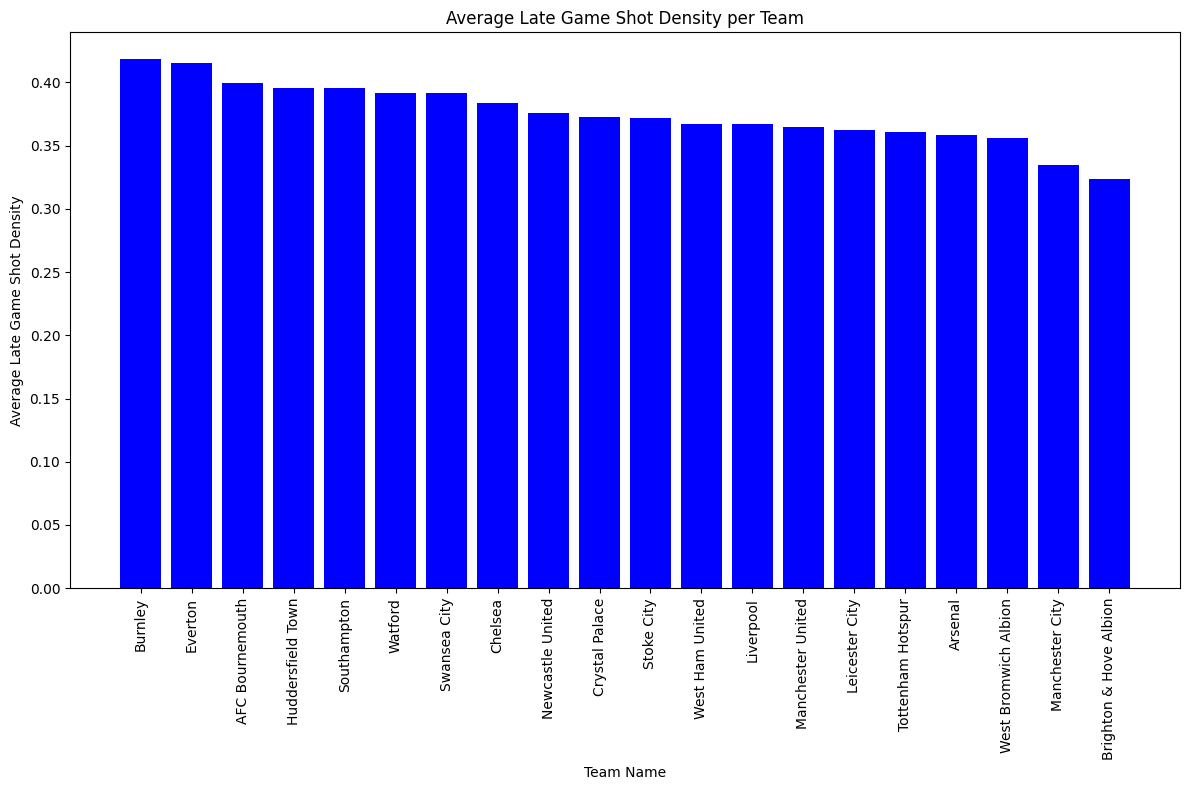

In [15]:
avg_late_density_per_team = grouped_with_names.groupby('teamName')['lateGameDensity'].mean().reset_index()

avg_late_density_per_team = avg_late_density_per_team.sort_values(by='lateGameDensity', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(avg_late_density_per_team['teamName'], avg_late_density_per_team['lateGameDensity'], color='blue')
plt.xlabel('Team Name')
plt.ylabel('Average Late Game Shot Density')
plt.title('Average Late Game Shot Density per Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

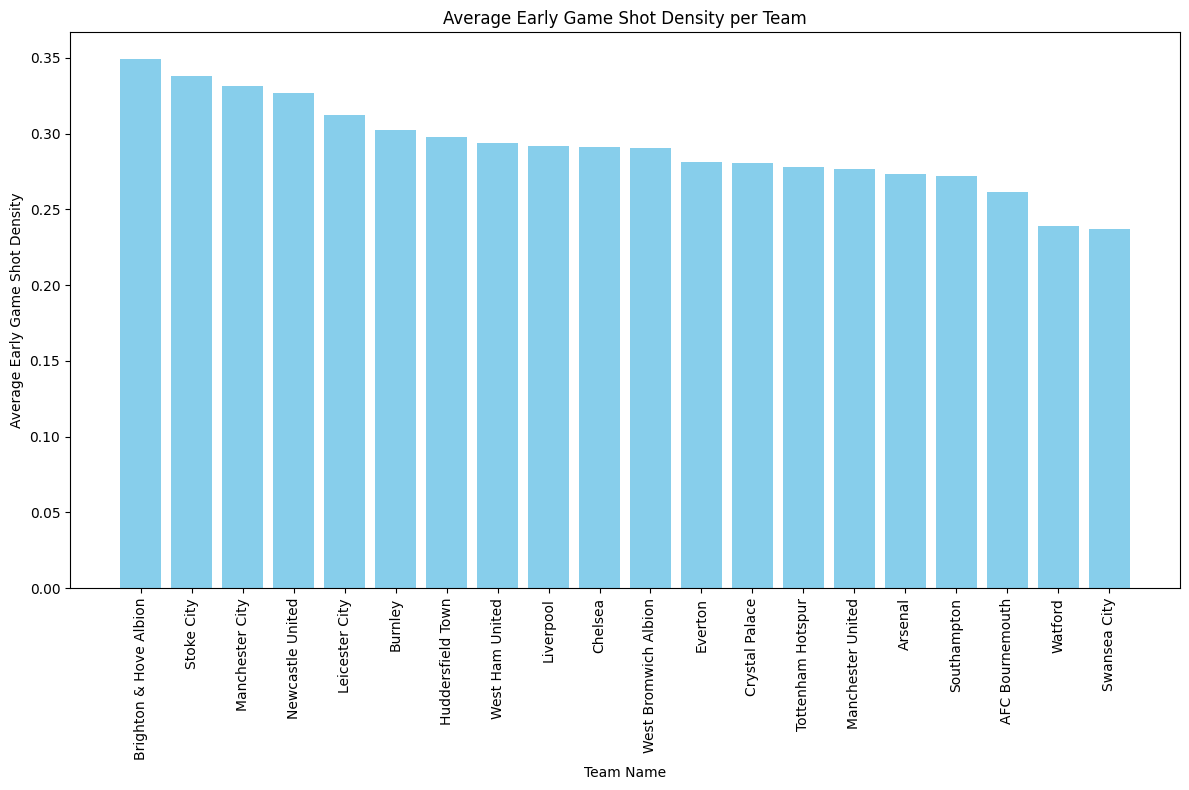

In [16]:
avg_late_density_per_team = grouped_with_names.groupby('teamName')['earlyGameDensity'].mean().reset_index()

avg_late_density_per_team = avg_late_density_per_team.sort_values(by='earlyGameDensity', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(avg_late_density_per_team['teamName'], avg_late_density_per_team['earlyGameDensity'], color='skyblue')
plt.xlabel('Team Name')
plt.ylabel('Average Early Game Shot Density')
plt.title('Average Early Game Shot Density per Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
england_fouls = pd.read_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_fouls.csv')

In [18]:
grouped_fouls = england_fouls.groupby('teamId')['eventMin'].apply(list).reset_index()

In [19]:
grouped_fouls.columns = ['teamId', 'eventMinArray']

In [20]:
grouped_fouls

,teamId,eventMinArray
0,1609,"[11.8, 17.5, 24.2, 49.4, 53.7, 57.9, 75.4, 88...."
1,1610,"[2.0, 9.3, 13.0, 15.9, 37.9, 41.4, 44.7, 46.2,..."
2,1611,"[0.7, 1.8, 3.5, 29.4, 30.7, 31.8, 34.9, 36.0, ..."
3,1612,"[19.1, 26.3, 33.7, 36.4, 40.0, 60.6, 67.0, 73...."
4,1613,"[0.6, 20.8, 26.8, 45.9, 47.9, 51.1, 55.5, 63.0..."
5,1619,"[12.0, 15.0, 21.4, 22.6, 31.1, 31.9, 32.4, 42...."
6,1623,"[3.5, 13.3, 14.0, 17.3, 40.5, 41.5, 46.6, 51.8..."
7,1624,"[14.8, 30.4, 37.2, 47.3, 45.4, 47.5, 56.4, 74...."
8,1625,"[18.8, 26.4, 40.3, 43.2, 43.8, 78.0, 78.3, 81...."
9,1627,"[9.3, 12.4, 20.3, 33.6, 48.9, 54.7, 64.9, 66.1..."


In [21]:
grouped_fouls.to_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamFouls.csv', index=False)

In [22]:
team_fouls = pd.read_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamFouls.csv')
team_fouls.head()

,teamId,eventMinArray
0,1609,"[11.8, 17.5, 24.2, 49.4, 53.7, 57.9, 75.4, 88...."
1,1610,"[2.0, 9.3, 13.0, 15.9, 37.9, 41.4, 44.7, 46.2,..."
2,1611,"[0.7, 1.8, 3.5, 29.4, 30.7, 31.8, 34.9, 36.0, ..."
3,1612,"[19.1, 26.3, 33.7, 36.4, 40.0, 60.6, 67.0, 73...."
4,1613,"[0.6, 20.8, 26.8, 45.9, 47.9, 51.1, 55.5, 63.0..."


In [23]:
teams = pd.read_csv('/Users/kar/Documents/sagb_inrto_project/srcd_data/teams.csv')
team_names = teams[['wyId', 'name']].rename(columns={'wyId': 'teamId', 'name': 'teamName'})
grouped_fouls_with_names = pd.merge(grouped_fouls, team_names, on='teamId', how='left')

In [24]:
grouped_fouls_with_names

,teamId,eventMinArray,teamName
0,1609,"[11.8, 17.5, 24.2, 49.4, 53.7, 57.9, 75.4, 88....",Arsenal
1,1610,"[2.0, 9.3, 13.0, 15.9, 37.9, 41.4, 44.7, 46.2,...",Chelsea
2,1611,"[0.7, 1.8, 3.5, 29.4, 30.7, 31.8, 34.9, 36.0, ...",Manchester United
3,1612,"[19.1, 26.3, 33.7, 36.4, 40.0, 60.6, 67.0, 73....",Liverpool
4,1613,"[0.6, 20.8, 26.8, 45.9, 47.9, 51.1, 55.5, 63.0...",Newcastle United
5,1619,"[12.0, 15.0, 21.4, 22.6, 31.1, 31.9, 32.4, 42....",Southampton
6,1623,"[3.5, 13.3, 14.0, 17.3, 40.5, 41.5, 46.6, 51.8...",Everton
7,1624,"[14.8, 30.4, 37.2, 47.3, 45.4, 47.5, 56.4, 74....",Tottenham Hotspur
8,1625,"[18.8, 26.4, 40.3, 43.2, 43.8, 78.0, 78.3, 81....",Manchester City
9,1627,"[9.3, 12.4, 20.3, 33.6, 48.9, 54.7, 64.9, 66.1...",West Bromwich Albion


In [25]:
grouped_fouls_with_names.to_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamFouls.csv', index=False)

In [26]:
def calculate_foul_densities(event_mins):
    total_fouls = len(event_mins)
    if total_fouls == 0:
        return pd.Series([0, 0], index=['earlyGameDensity', 'lateGameDensity'])
    
    early_fouls = sum(minute <= 30 for minute in event_mins)
    late_fouls = sum(minute >= 60 for minute in event_mins)
    
    early_foul_density = early_fouls / total_fouls
    late_fouL_density = late_fouls / total_fouls
    
    return pd.Series([early_foul_density, late_fouL_density], index=['earlyGameDensity', 'lateGameDensity'])

foul_densities = grouped_fouls_with_names['eventMinArray'].apply(calculate_foul_densities)
grouped_fouls_with_names = pd.concat([grouped_fouls_with_names, foul_densities], axis=1)

grouped_fouls_with_names.head()

,teamId,eventMinArray,teamName,earlyGameDensity,lateGameDensity
0,1609,"[11.8, 17.5, 24.2, 49.4, 53.7, 57.9, 75.4, 88....",Arsenal,0.291878,0.357868
1,1610,"[2.0, 9.3, 13.0, 15.9, 37.9, 41.4, 44.7, 46.2,...",Chelsea,0.321526,0.354223
2,1611,"[0.7, 1.8, 3.5, 29.4, 30.7, 31.8, 34.9, 36.0, ...",Manchester United,0.286058,0.329327
3,1612,"[19.1, 26.3, 33.7, 36.4, 40.0, 60.6, 67.0, 73....",Liverpool,0.244957,0.400576
4,1613,"[0.6, 20.8, 26.8, 45.9, 47.9, 51.1, 55.5, 63.0...",Newcastle United,0.258993,0.381295


In [27]:
grouped_fouls_with_names.to_csv('/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_TeamFouls.csv', index=False)

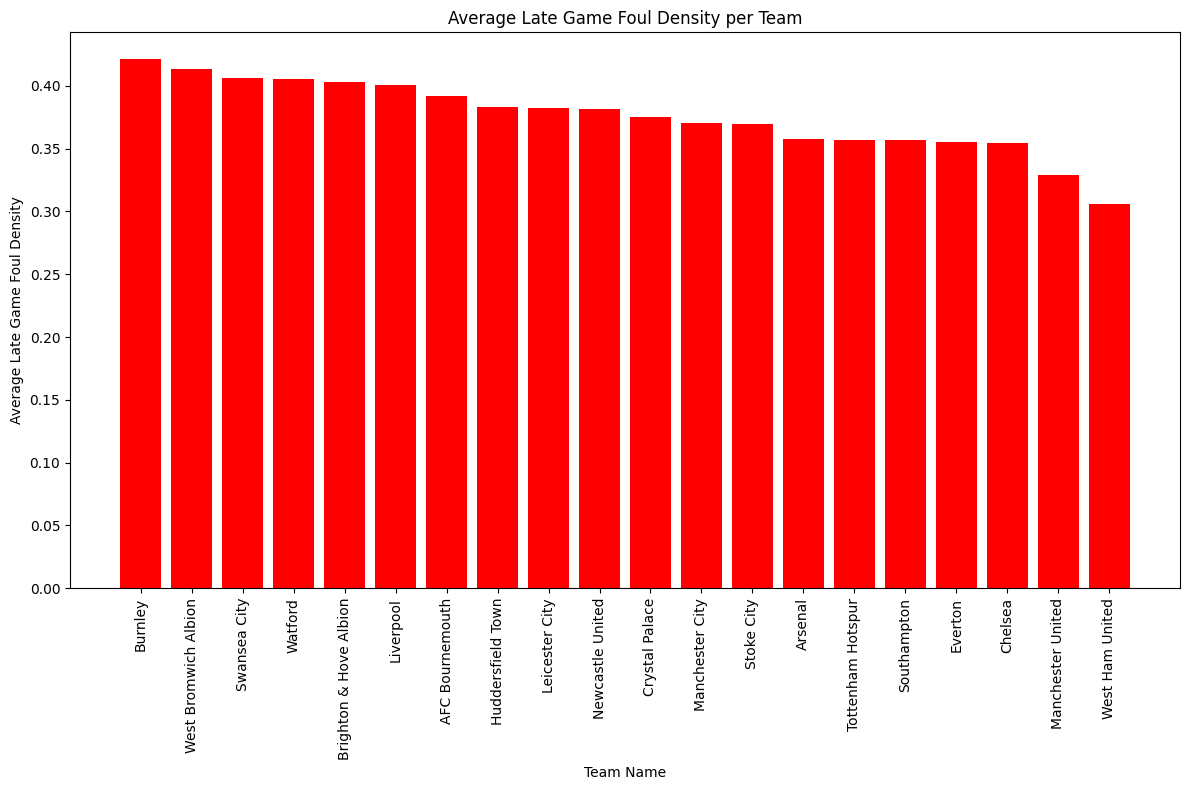

In [28]:
avg_foul_late_density_per_team = grouped_fouls_with_names.groupby('teamName')['lateGameDensity'].mean().reset_index()

avg_foul_late_density_per_team = avg_foul_late_density_per_team.sort_values(by='lateGameDensity', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(avg_foul_late_density_per_team['teamName'], avg_foul_late_density_per_team['lateGameDensity'], color='red')
plt.xlabel('Team Name')
plt.ylabel('Average Late Game Foul Density')
plt.title('Average Late Game Foul Density per Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

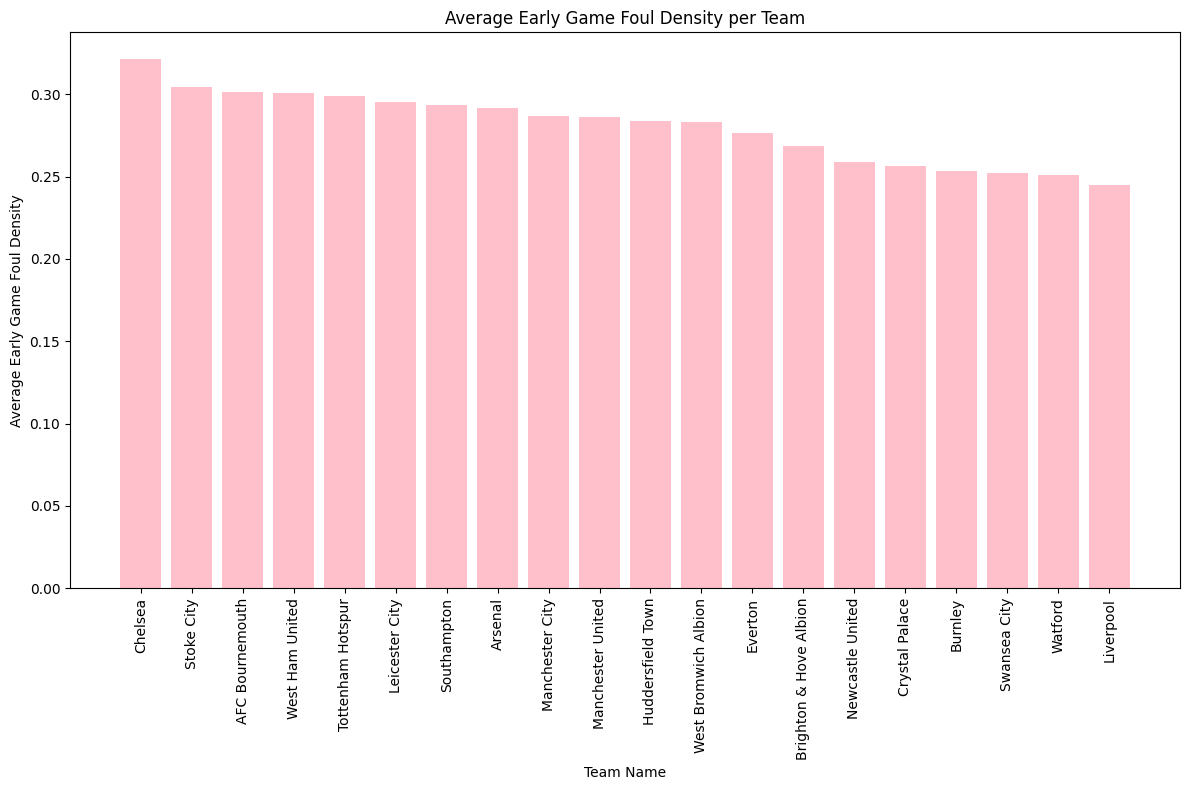

In [29]:
avg_foul_late_density_per_team = grouped_fouls_with_names.groupby('teamName')['earlyGameDensity'].mean().reset_index()

avg_foul_late_density_per_team = avg_foul_late_density_per_team.sort_values(by='earlyGameDensity', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(avg_foul_late_density_per_team['teamName'], avg_foul_late_density_per_team['earlyGameDensity'], color='pink')
plt.xlabel('Team Name')
plt.ylabel('Average Early Game Foul Density')
plt.title('Average Early Game Foul Density per Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()